In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Atur Path Proyek (Gunakan Relative Path setelah ini)
path_utama = '/content/drive/MyDrive/UAS_DataScience'
os.chdir(os.path.join(path_utama, 'notebooks'))
print(f"✅ Lokasi aktif: {os.getcwd()}")

Mounted at /content/drive
✅ Lokasi aktif: /content/drive/MyDrive/UAS_DataScience/notebooks


In [2]:
# 1. Load Data
df = pd.read_excel('../data/Dry_Bean_Dataset.xlsx')

/tmp/ipython-input-3773275110.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


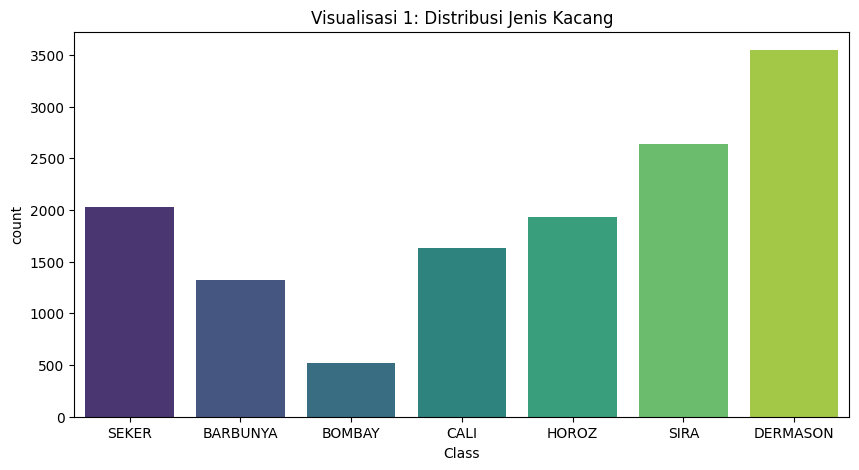

In [3]:
# 2. Visualisasi Distribusi Kelas
plt.figure(figsize=(10, 5))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Visualisasi 1: Distribusi Jenis Kacang')
plt.show()

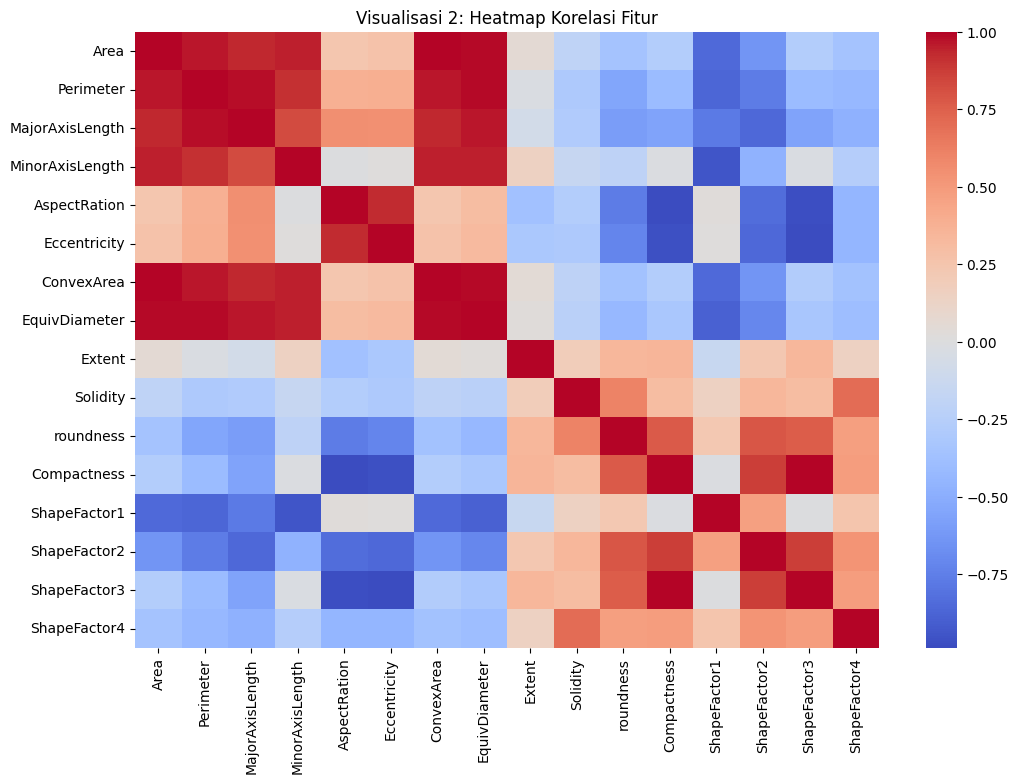

In [4]:
# 3. Visualisasi Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap='coolwarm', annot=False)
plt.title('Visualisasi 2: Heatmap Korelasi Fitur')
plt.show()

In [5]:
# 1. Encoding Label
le = LabelEncoder()
y_encoded = le.fit_transform(df['Class'])

# 2. Scaling Fitur
X = df.drop('Class', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split Data 80:20
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 4. Khusus Deep Learning (One-Hot Encoding)
y_train_dl = tf.keras.utils.to_categorical(y_train)
y_test_dl = tf.keras.utils.to_categorical(y_test)

print("✅ Data Preparation Selesai: Scaling dan Encoding berhasil.")

✅ Data Preparation Selesai: Scaling dan Encoding berhasil.


In [6]:
# Model 1 – Baseline Model (Logistic Regression)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Inisialisasi Model
model_base = LogisticRegression(max_iter=1000)

# Latih Model
model_base.fit(X_train, y_train)

# Evaluasi
acc_base = accuracy_score(y_test, model_base.predict(X_test))
print(f"✅ Akurasi Model 1 (Logistic Regression): {acc_base * 100:.2f}%")

✅ Akurasi Model 1 (Logistic Regression): 92.69%


In [12]:
import joblib

# Simpan Model 1 (Logistic Regression)
joblib.dump(model_base, '../models/logistic_regression_model.pkl')
print("✅ Model 1 (Logistic Regression) disimpan sebagai 'logistic_regression_model.pkl'")

# Simpan Model 3 (Deep Learning MLP)
model_dl.save('../models/deep_learning_mlp_model.h5')
print("✅ Model 3 (Deep Learning MLP) disimpan sebagai 'deep_learning_mlp_model.h5'")

print("Semua model sekarang telah disimpan di Google Drive Anda.")

✅ Model 1 (Logistic Regression) disimpan sebagai 'logistic_regression_model.pkl'
✅ Model 3 (Deep Learning MLP) disimpan sebagai 'deep_learning_mlp_model.h5'
Semua model sekarang telah disimpan di Google Drive Anda.


### Unduh Model ke Komputer Lokal

Anda dapat menggunakan kode di bawah ini untuk mengunduh setiap model yang telah disimpan ke komputer lokal Anda. Harap diingat bahwa `joblib.dump` dan `model.save` menyimpan file ke Google Drive Anda. Fungsi `files.download` akan mengunduhnya dari sana ke mesin tempat Anda menjalankan Colab.

In [13]:
from google.colab import files

# Unduh Model 1 (Logistic Regression)
try:
    files.download('../models/logistic_regression_model.pkl')
    print("Mengunduh logistic_regression_model.pkl...")
except Exception as e:
    print(f"Gagal mengunduh logistic_regression_model.pkl: {e}")

# Unduh Model 2 (Random Forest) - sudah disimpan sebelumnya
try:
    files.download('../models/best_model_rf.pkl')
    print("Mengunduh best_model_rf.pkl...")
except Exception as e:
    print(f"Gagal mengunduh best_model_rf.pkl: {e}")

# Unduh Model 3 (Deep Learning MLP)
try:
    files.download('../models/deep_learning_mlp_model.h5')
    print("Mengunduh deep_learning_mlp_model.h5...")
except Exception as e:
    print(f"Gagal mengunduh deep_learning_mlp_model.h5: {e}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mengunduh logistic_regression_model.pkl...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mengunduh best_model_rf.pkl...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mengunduh deep_learning_mlp_model.h5...


In [7]:
# Model 2 – Advanced Model (Random Forest)

from sklearn.ensemble import RandomForestClassifier

# Inisialisasi Model
model_adv = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih Model
model_adv.fit(X_train, y_train)

# Evaluasi
acc_adv = accuracy_score(y_test, model_adv.predict(X_test))
print(f"✅ Akurasi Model 2 (Random Forest): {acc_adv * 100:.2f}%")

✅ Akurasi Model 2 (Random Forest): 92.54%


In [8]:
# Model 3 – Deep Learning Model (Multilayer Perceptron)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Membangun Arsitektur MLP (3 Hidden Layers sesuai instruksi)
model_dl = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train_dl.shape[1], activation='softmax')
])

# Kompilasi
model_dl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih Model
print("Melatih Deep Learning Model...")
model_dl.fit(X_train, y_train_dl, epochs=30, batch_size=32, verbose=1)

# Evaluasi
_, acc_dl = model_dl.evaluate(X_test, y_test_dl, verbose=0)
print(f"✅ Akurasi Model 3 (Deep Learning MLP): {acc_dl * 100:.2f}%")

Melatih Deep Learning Model...
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


341/341 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7741 - loss: 0.7684
Epoch 2/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9248 - loss: 0.2211
Epoch 3/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9270 - loss: 0.2003
Epoch 4/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9287 - loss: 0.1903
Epoch 5/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9272 - loss: 0.1956
Epoch 6/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9303 - loss: 0.1922
Epoch 7/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9279 - loss: 0.1925
Epoch 8/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9311 - loss: 0.1812
Epoch 9/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9328 - loss: 0.1839
Epoch 10/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9322 - loss: 0.1728
Epoch 11/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9284 - loss: 0.1800
Epoch 12/30
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

/tmp/ipython-input-3914718454.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=accuracies, palette='Set2')


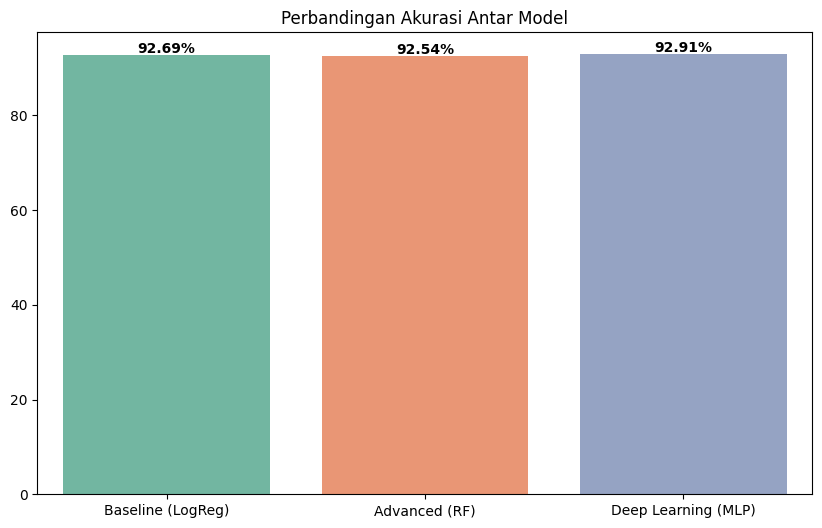

In [9]:
from sklearn.metrics import confusion_matrix

# 1. Plot Perbandingan Akurasi
plt.figure(figsize=(10, 6))
labels = ['Baseline (LogReg)', 'Advanced (RF)', 'Deep Learning (MLP)']
accuracies = [acc_base * 100, acc_adv * 100, acc_dl * 100]
sns.barplot(x=labels, y=accuracies, palette='Set2')
plt.title('Perbandingan Akurasi Antar Model')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontweight='bold')
plt.show()



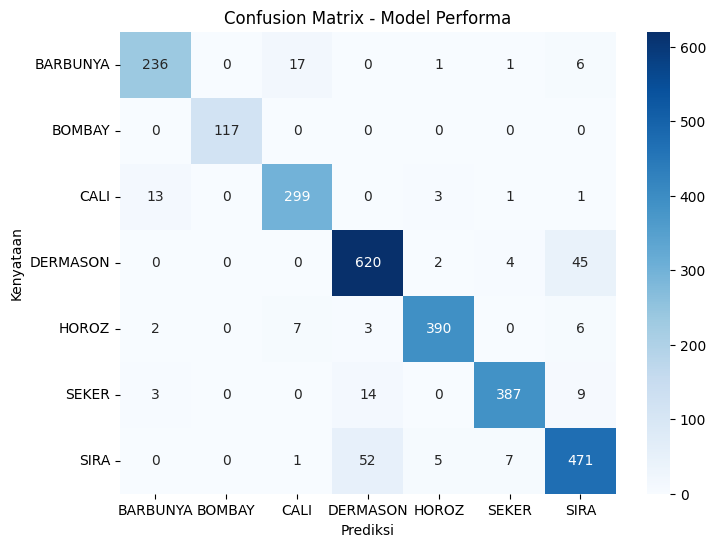

In [10]:
# 2. Confusion Matrix untuk Model Terbaik (Misal Random Forest)
y_pred_best = model_adv.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Model Performa')
plt.xlabel('Prediksi')
plt.ylabel('Kenyataan')
plt.show()



In [11]:
# 3. Simpan Model
import joblib
joblib.dump(model_adv, '../models/best_model_rf.pkl')
print("✅ Proyek Selesai! Model terbaik telah disimpan.")

✅ Proyek Selesai! Model terbaik telah disimpan.
